In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/MachineTeachingEdu/JAI2025-IA-Educacao/refs/heads/main/An%C3%A1lise%20de%20Dados/dados_final.csv", sep=',')
dados.head()

,Id,nearestBusStop,backwardsCombine,firstAndLast,singlePigLatin,hasTwoDigits,isEvenPositiveInt,isSubstring,helloWorld,doubleX,...,secondHalf,treasureHunt,mostAnagrams,factorial,fibonacci,gcd,listOfLists,friendOfFriends,findTheCircle,Notas
0,S002,0.750,1.0,1.0,0.8,0.833333,1.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.690317
1,S011,0.875,1.0,1.0,1.0,0.666667,1.0,1.000000,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.823890
2,S014,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549519
3,S020,0.750,1.0,1.0,1.0,0.333333,0.0,0.000000,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489055
4,S023,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350000


Quais as questões mais difíceis? E as mais fáceis?

1. Menos/Mais respostas de alunos
2. Menores/Maiores médias de acerto

In [ ]:
dados = dados[dados['Id'] != 'SA']
dados_semId = dados.drop(["Id"], axis=1)
X = dados_semId.drop("Notas", axis=1)
y = dados_semId["Notas"]

In [ ]:
# prompt: count the values of df columns that are different than 0 per column
# Calculate the count of non-zero values for each column
non_zero_counts = (X == 0).sum()
non_zero_counts.sort_values(ascending=False)
non_zero_counts = non_zero_counts.rename("Não respondidos")
non_zero_counts = pd.DataFrame(non_zero_counts)
non_zero_counts["% de resposta"] = 1 - non_zero_counts["Não respondidos"] / len(dados_semId)
non_zero_counts.sort_values(by="% de resposta", ascending=False)

,Não respondidos,% de resposta
helloWorld,16,0.818182
doubleX,24,0.727273
raiseToPower,31,0.647727
convertToDegrees,35,0.602273
leftoverCandy,43,0.511364
intToFloat,44,0.500000
howManyEggCartons,48,0.454545
findRoot,48,0.454545
kthDigit,54,0.386364
overNineThousand,59,0.329545


In [ ]:
X.mean().sort_values()

,0
findTheCircle,0.000000
treasureHunt,0.000598
mostAnagrams,0.002089
friendOfFriends,0.002392
listOfLists,0.012500
gcd,0.015909
factorial,0.026860
fibonacci,0.028846
createNumberBlock,0.037190
secondHalf,0.045455


Há correlação entre os exercícios terminados?


In [ ]:
# prompt: order a dataframe by a specific column order
# Get the sorted column names based on their means (from previous code)
ordem_das_colunas = X.mean().sort_values(ascending=False).index
# Reindex the dataframe to order the columns
dados_ordenados = X[ordem_das_colunas]
corr = dados_ordenados.corr()

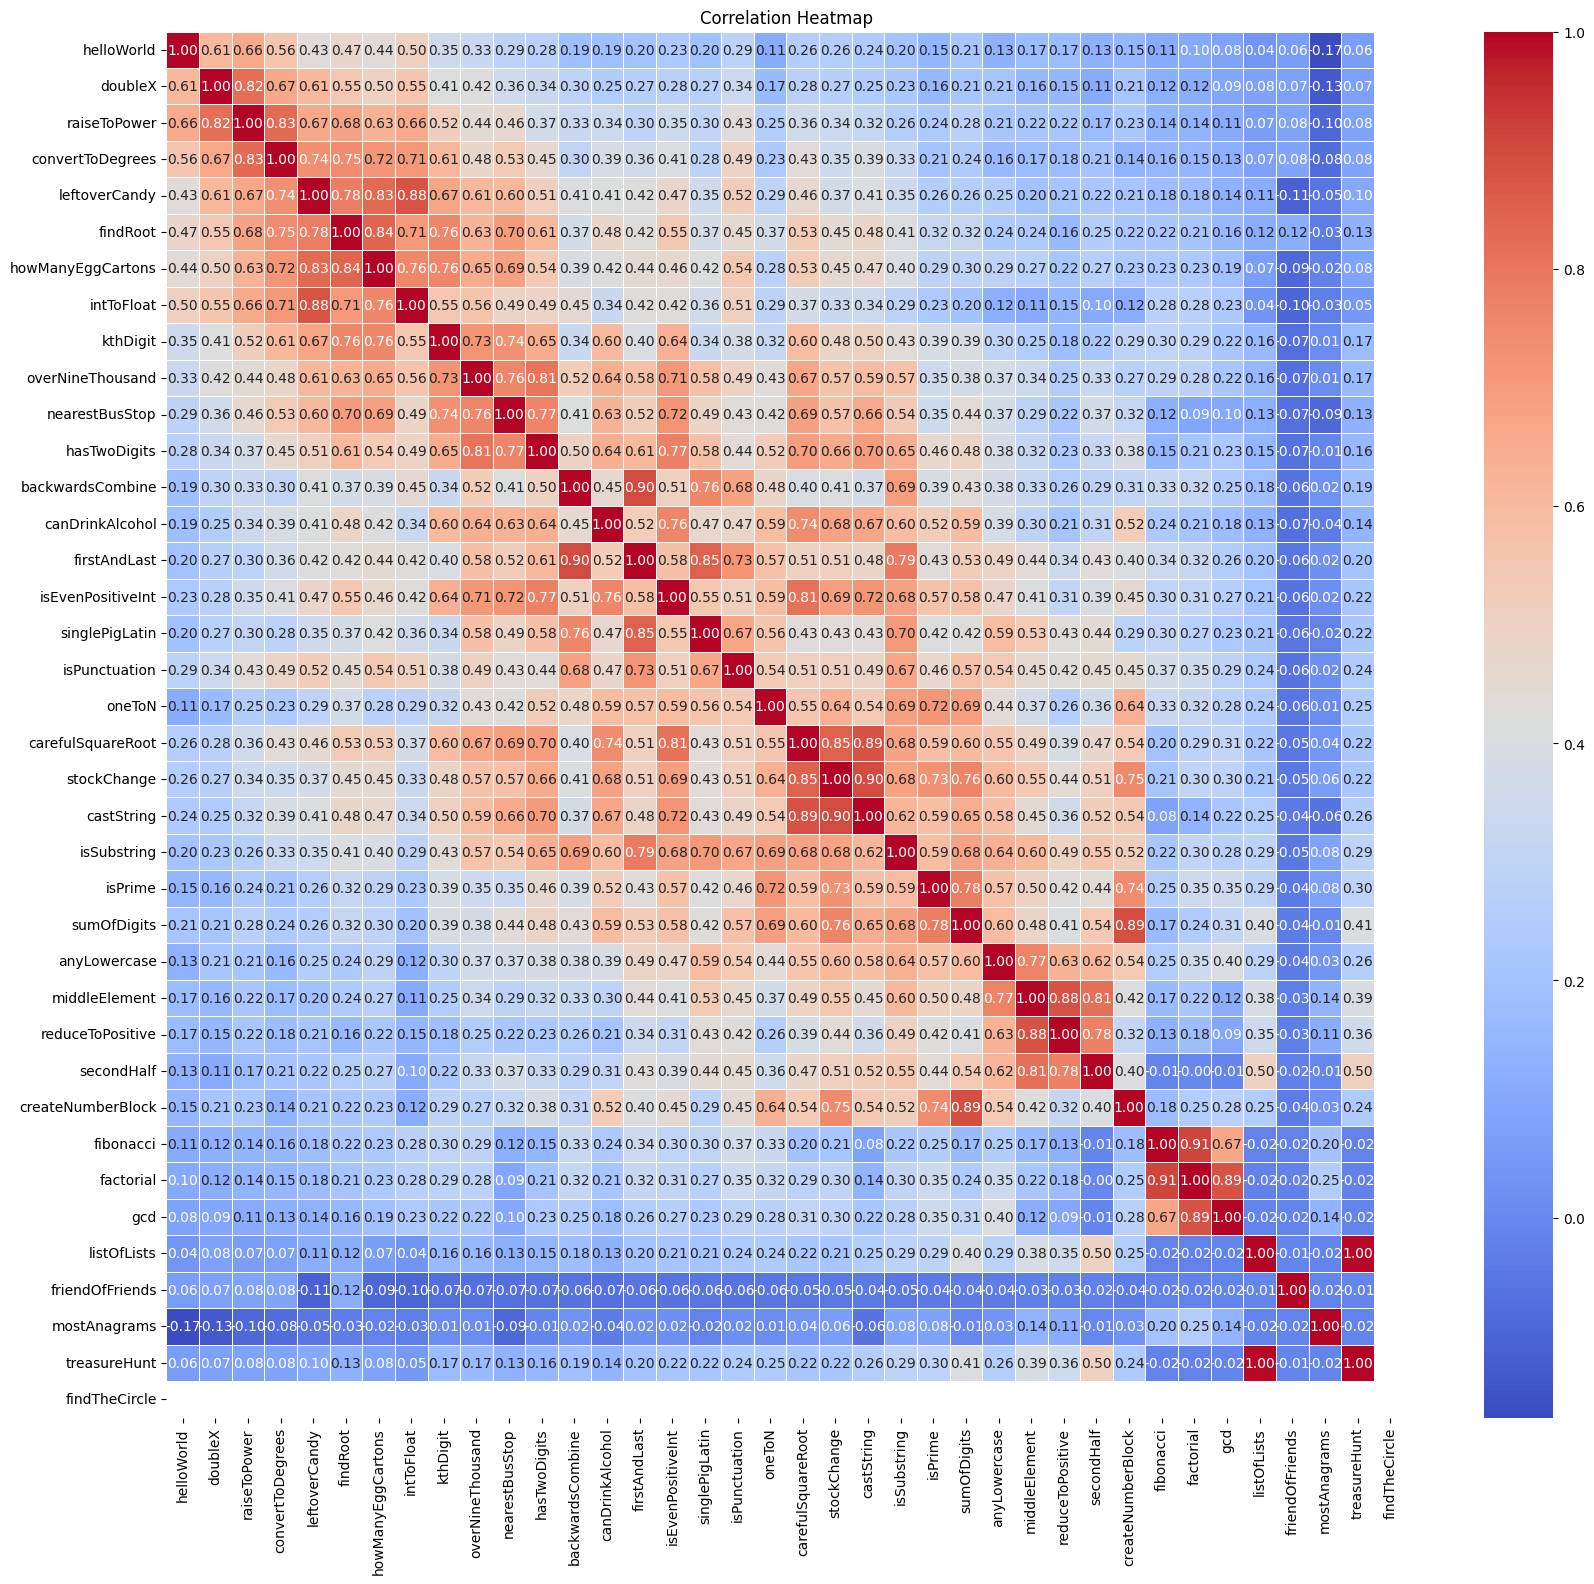

In [ ]:
# prompt: make a compact heatmap correlation plot
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Há correlação entre os alunos?

In [ ]:
def filtra_dados(dados, qtdProblemas=5):
  mask = (dados_semId != 0).sum(axis=1) >= qtdProblemas
  dados_filtrados = dados[mask].copy()
  return dados_filtrados

def maiores_correlacoes(dados, corrLimite=0.95):
  corr = dados.T.corr()
  # prompt: select only the highest correlations
  # Extract the correlation values from the upper triangle of the matrix
  correlacoes = corr.mask(np.tril(np.ones(corr.shape)).astype(bool)).stack()

  # Sort the correlation values
  correlacoes_ordenadas = correlacoes.sort_values(ascending=False)
  correlacoes_ordenadas = correlacoes_ordenadas[correlacoes_ordenadas > corrLimite]

  correlacoes_list = [item for sublist in list(correlacoes_ordenadas.index) for item in sublist]
  ids = set(correlacoes_list)

  return (correlacoes_ordenadas, ids)


# correlacoes = maiores_correlacoes(dados_ordenados)
correlacoes, ids = maiores_correlacoes(filtra_dados(dados_ordenados, 5), 0.98)
print("Diferentes ids:", len(ids))
print("Highest correlations:")
print(correlacoes)

Diferentes ids: 16
Highest correlations:
26  34    0.999991
39  87    0.999191
34  41    0.998792
26  41    0.998568
15  41    0.996387
20  37    0.996261
26  51    0.993126
34  51    0.992793
15  34    0.991010
    26    0.990418
42  67    0.989921
17  87    0.989671
    39    0.989284
41  51    0.987730
56  59    0.987202
72  84    0.985881
dtype: float64


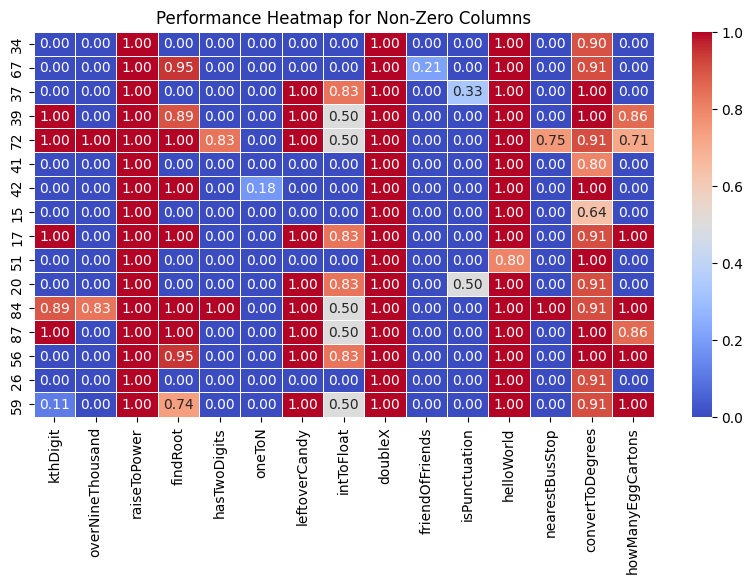

In [ ]:
# prompt: given two indices in a df, create a heatmap containing only the columns that are non zero in both indices

def heatmap_nonzero_cols(df, ids):
  """
  Creates a heatmap containing only the columns that are non-zero
  in both specified indices of the DataFrame.

  Args:
    df: The input pandas DataFrame.
    ids: Indices a serem colocados no plot
  """
  # Get the rows at the specified indices
  df_subset = pd.DataFrame()
  col_list = []
  for id in ids:
    row = df.loc[id]
    col_list += list(row.index[(row != 0)])
    df_subset = pd.concat([df_subset, row], axis=1)
  df_subset = df_subset.T

  # Find columns where both values are non-zero
  non_zero_cols = df_subset[list(set(col_list))]
  if non_zero_cols.empty:
    print(f"No common non-zero columns found")
    return

  # Create the heatmap
  plt.figure(figsize=(10, 5))
  sns.heatmap(non_zero_cols, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
  plt.title(f'Performance Heatmap for Non-Zero Columns')
  plt.show()

heatmap_nonzero_cols(dados_ordenados, ids)

Quais problemas possuem maior correlação com a variável-alvo (nota)?

In [ ]:
corr

,helloWorld,doubleX,raiseToPower,convertToDegrees,leftoverCandy,findRoot,howManyEggCartons,intToFloat,kthDigit,overNineThousand,...,secondHalf,createNumberBlock,fibonacci,factorial,gcd,listOfLists,friendOfFriends,mostAnagrams,treasureHunt,findTheCircle
helloWorld,1.000000,0.608113,0.661756,0.556680,0.430198,0.473530,0.442380,0.504326,0.353595,0.329591,...,0.130259,0.153822,0.108281,0.104361,0.081330,0.040698,0.062320,-0.168437,0.062320,NaN
doubleX,0.608113,1.000000,0.821823,0.665237,0.611396,0.552170,0.495602,0.553546,0.411347,0.417773,...,0.106156,0.212650,0.119726,0.115392,0.089927,0.075508,0.068907,-0.127469,0.068907,NaN
raiseToPower,0.661756,0.821823,1.000000,0.828192,0.665914,0.679863,0.627250,0.656361,0.515599,0.443261,...,0.171489,0.227824,0.142554,0.137393,0.107073,0.067428,0.082045,-0.095402,0.082045,NaN
convertToDegrees,0.556680,0.665237,0.828192,1.000000,0.737198,0.748784,0.718821,0.712107,0.608699,0.478530,...,0.205524,0.141453,0.155457,0.154077,0.128104,0.069977,0.083068,-0.081006,0.083068,NaN
leftoverCandy,0.430198,0.611396,0.665914,0.737198,1.000000,0.783039,0.831236,0.880030,0.674453,0.606383,...,0.219055,0.206806,0.182094,0.175502,0.136771,0.114841,-0.109676,-0.054856,0.104802,NaN
findRoot,0.473530,0.552170,0.679863,0.748784,0.783039,1.000000,0.841674,0.705426,0.758570,0.625658,...,0.252237,0.221968,0.217729,0.207467,0.157183,0.118836,0.117059,-0.032183,0.128899,NaN
howManyEggCartons,0.442380,0.495602,0.627250,0.718821,0.831236,0.841674,1.000000,0.755710,0.756888,0.649822,...,0.269351,0.234365,0.230141,0.233240,0.190263,0.068707,-0.091167,-0.020504,0.078088,NaN
intToFloat,0.504326,0.553546,0.656361,0.712107,0.880030,0.705426,0.755710,1.000000,0.552268,0.562113,...,0.103143,0.117259,0.276511,0.276322,0.233909,0.036500,-0.099927,-0.029086,0.046632,NaN
kthDigit,0.353595,0.411347,0.515599,0.608699,0.674453,0.758570,0.756888,0.552268,1.000000,0.725801,...,0.215528,0.290666,0.297928,0.287143,0.223775,0.163380,-0.074607,0.005529,0.171469,NaN
overNineThousand,0.329591,0.417773,0.443261,0.478530,0.606383,0.625658,0.649822,0.562113,0.725801,1.000000,...,0.328762,0.272205,0.290616,0.280096,0.218284,0.159441,-0.072072,0.006034,0.167261,NaN


In [ ]:
# prompt: find the columns with highest correlation with "notas" column
corr_with_notas = dados_semId.corr()['Notas'].sort_values(ascending=False)
print("Colunas com a maior correlação com 'notas':")
corr_with_notas

Colunas com a maior correlação com 'notas':


,Notas
Notas,1.000000
canDrinkAlcohol,0.699680
isEvenPositiveInt,0.672752
hasTwoDigits,0.658411
doubleX,0.647651
oneToN,0.633903
nearestBusStop,0.629422
raiseToPower,0.620315
carefulSquareRoot,0.611942
overNineThousand,0.609113


E se utilizarmos somente os problemas mais respondidos, será que já é possível ter alguma ideia da variável-alvo?

In [ ]:
most_answered = non_zero_counts[non_zero_counts["% de resposta"] > 0.50]
most_answered

,Não respondidos,% de resposta
helloWorld,16,0.818182
doubleX,24,0.727273
raiseToPower,31,0.647727
convertToDegrees,35,0.602273
leftoverCandy,43,0.511364


In [ ]:
# prompt: find the columns with highest correlation with "notas" column

corr_with_notas = dados_semId.corr()[list(most_answered.index)].loc["Notas"].sort_values(ascending=False)
print("Colunas com a maior correlação com 'notas':")
corr_with_notas

Colunas com a maior correlação com 'notas':


,Notas
doubleX,0.647651
raiseToPower,0.620315
convertToDegrees,0.563497
leftoverCandy,0.541992
helloWorld,0.400915


Neste momento, já temos algumas hipóteses sobre os nossos dados. Dados os gráficos apresentados, quais hipóteses podemos ter?